<a href="https://colab.research.google.com/github/Ahmad-br-97/Data-Mining-Project/blob/main/baratian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install stopwords_guilannlp

In [2]:
!pip install hazm

     |████████████████████████████████| 317kB 8.7MB/s 
     |████████████████████████████████| 235kB 13.1MB/s 
     |████████████████████████████████| 1.4MB 9.8MB/s 
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp36-cp36m-linux_x86_64.whl size=154813 sha256=5ca066c8ef05b9458fc8b5b927cd360d374679b2d850084de8c0a277f1981265
  Stored in directory: /root/.cache/pip/wheels/66/15/54/4510dce8bb958b1cdd2c47425cbd1e1eecc0480ac9bb1fb9ab
  Created wheel for nltk: filename=nltk-3.3-cp36-none-any.whl size=1394469 sha256=e14d88e24ecd5fb44540f801dde6ca1103ccc3dfc07363ad116555463d84d086
  Stored in directory: /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
Successfully built libwapiti nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [3]:
!pip install keras
!pip install nltk

In [4]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from hazm import *
import re
from stopwords_guilannlp import *
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


STOPWORDS = stopwords_output("Persian","nar")


In [6]:
vocab_size = 500
embedding_dim = 64
max_length = 250
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [7]:
articles = []
labels = []

datas=pd.read_excel("/content/My_DigiKala_Comments_1.xlsx")
for text in datas['comment']:
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
data_classes=['U0001F636', 'U0001F630', 'U0001F9D0', 'U0001F642', 'U0001F648', 'U0001F61B', 'U0001F915', 'U0001F493', 'U0001F620', 'U0001F916']
d = dict(zip(data_classes, range(0,10)))
datas['Label']=datas['Label'].map(d, na_action='ignore')

labels=datas['Label']
articles=datas['comment']
print(len(labels))
print(len(articles))

1999
1999


In [8]:
from sklearn.model_selection import train_test_split

train_articles, validation_articles, train_labels, validation_labels = train_test_split(articles,labels, test_size = 0.20, random_state = 22)
print(train_articles.shape,validation_articles.shape)
print(train_labels.shape,validation_labels.shape)

(1599,) (400,)
(1599,) (400,)


In [9]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'از': 4,
 'این': 6,
 'با': 8,
 'به': 5,
 'در': 10,
 'رو': 9,
 'من': 7,
 'و': 2,
 'که': 3}

In [10]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[10])

[85, 42, 10, 133, 144, 169]


In [11]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))
train_padded.shape

30
250
14
250
6
250


(1599, 250)

In [12]:
print(train_padded[10])

[ 85  42  10 133 144 169   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [13]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)


400
(400, 250)


In [14]:
train_labels

417     3
716     9
1495    9
1414    3
757     7
       ..
356     3
960     1
812     3
132     5
885     7
Name: Label, Length: 1599, dtype: int64

In [15]:

training_label_seq = train_labels
validation_label_seq =validation_labels
#print(training_label_seq.shape)
#print(validation_label_seq.shape)


In [16]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

ارزش خرید در شگفت انگیز دارد ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
گوشی خوبیه ولی هواوی میت 10پرو از این بهتره قیمتشم مناسبه اینو به کسایی که اسم چین براشون ازار دهنده نیست پیشنهاد میکنم


In [17]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          32000     
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 106,954
Trainable params: 106,954
Non-trainable params: 0
_________________________________________________________________


In [18]:
from keras.utils import to_categorical
training_label_seq = to_categorical(training_label_seq, 10)
validation_label_seq = to_categorical(validation_label_seq, 10)

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 20
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/20
50/50 - 15s - loss: 2.0899 - accuracy: 0.2720 - val_loss: 2.0414 - val_accuracy: 0.2800
Epoch 2/20
50/50 - 11s - loss: 1.9641 - accuracy: 0.2983 - val_loss: 1.9322 - val_accuracy: 0.3150
Epoch 3/20
50/50 - 11s - loss: 1.7516 - accuracy: 0.3940 - val_loss: 1.7757 - val_accuracy: 0.4050
Epoch 4/20
50/50 - 11s - loss: 1.4248 - accuracy: 0.5278 - val_loss: 1.5812 - val_accuracy: 0.4925
Epoch 5/20
50/50 - 11s - loss: 1.1593 - accuracy: 0.6573 - val_loss: 1.4919 - val_accuracy: 0.5325
Epoch 6/20
50/50 - 11s - loss: 1.0130 - accuracy: 0.6942 - val_loss: 1.4787 - val_accuracy: 0.5550
Epoch 7/20
50/50 - 11s - loss: 0.8609 - accuracy: 0.7323 - val_loss: 1.5320 - val_accuracy: 0.5600
Epoch 8/20
50/50 - 11s - loss: 0.7723 - accuracy: 0.7486 - val_loss: 1.5226 - val_accuracy: 0.5800
Epoch 9/20
50/50 - 11s - loss: 0.6780 - accuracy: 0.7849 - val_loss: 1.5782 - val_accuracy: 0.5650
Epoch 10/20
50/50 - 11s - loss: 0.5991 - accuracy: 0.8111 - val_loss: 1.5910 - val_accuracy: 0.5825
Epoch 11/

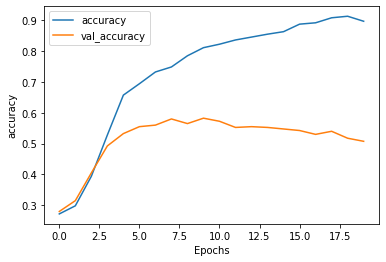

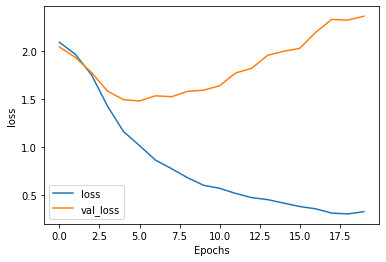

In [20]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [21]:
Y_pred = model.predict(validation_padded)


In [22]:
Y_pred = np.argmax(Y_pred, axis=1)
Y_test = np.argmax(validation_label_seq, axis=1)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.43      0.58      0.49        36
           1       0.44      0.43      0.44        37
           2       0.00      0.00      0.00        14
           3       0.68      0.61      0.64       112
           4       0.00      0.00      0.00        17
           5       0.61      0.63      0.62        70
           6       0.12      0.44      0.19         9
           7       0.64      0.57      0.60        44
           8       0.00      0.00      0.00        11
           9       0.46      0.50      0.48        50

    accuracy                           0.51       400
   macro avg       0.34      0.38      0.35       400
weighted avg       0.51      0.51      0.50       400

